In [1]:
import pickle
import h5py
import matplotlib.pyplot as plt
import numpy as np

In [2]:
with open('result/outer_cv.pkl', 'rb') as f:
    results = pickle.load(f)
with open('result/args.pkl', 'rb') as f:
    args = pickle.load(f)

In [3]:
print(args.path)

/home/pjarosik/data/simulated/piston/1cm.hdf5


In [4]:
input_data = h5py.File(args.path, 'r')

In [8]:
train_idx = results[0]['train_idx']
test_idx = results[0]['test_idx']
print("Number of training examples: %d" % len(train_idx))
print("Number of test examples: %d" % len(test_idx))

# czy indeksy chunków sie nie nakladaja?
test_idx_set = set(train_idx) 
train_idx_set = set(test_idx)
assert len(test_idx_set.intersection(train_idx_set)) == 0
    
# czy indeksy z results pokrywajac w calosci wymiar z X?    
all_indices = test_idx_set.union(train_idx_set)
print("All indices size: %d, min %d, max %d" % (len(all_indices), min(all_indices), max(all_indices)))
print("Shape of the X: %s" % str(input_data['X'].shape))
assert len(all_indices) == input_data['X'].shape[0]

Number of training examples: 96768
Number of test examples: 41472
All indices size: 138240, min 0, max 138239
Shape of the X: (138240, 1300)


In [6]:
train_y = input_data['y'][train_idx.tolist()]
test_y = input_data['y'][test_idx.tolist()]

Distribution of the alpha value in training and test datasets.
Training


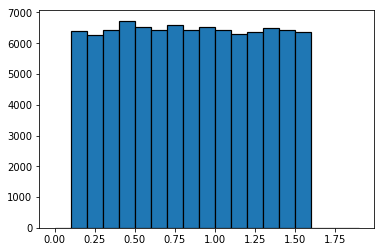

Testing


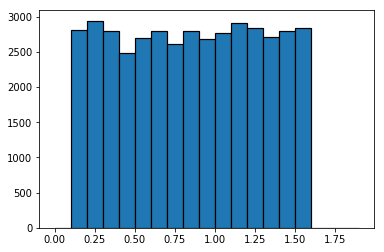

In [10]:
# ile chunkow dla poszczegolnych wartosci alpha
print("Distribution of the alpha value in training and test datasets.")
print("Training")
plt.hist(train_y, edgecolor='black', linewidth=1.2, bins=np.arange(0, 2, .1))
plt.show()
print("Testing")
plt.hist(test_y, edgecolor='black', linewidth=1.2, bins=np.arange(0, 2, .1))
plt.show()